# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 4б

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **3 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [84]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'


#Теоретическая часть

Бутстреп:

1. 5 баллов Пусть $X_1, ..., X_n$  &mdash; некоторая выборка и $X_1^*, ..., X_n^*$ --- построенная по ней бутстрепная выборка. С какой вероятностью элемент $X_i$ исходной выборки попадет в бутстрепную выборку? К чему стремится эта вероятность с ростом размера выборки? Посчитайте среднее число уникальных элементов в бутстрепной выборке, если в исходной выборке все наблюдения различны.

1) Посчитаем вероятность непопадания $X_i$ в выборку ($P_1$ - вероятность непопадания на $i$ позицию): 
$$ P = 1 - (P_1)^n = 1 - \left( \dfrac{n - 1}{n} \right)^n $$
$$ \lim\limits_{n \to \infty} 1 - \left( \dfrac{n - 1}{n} \right)^n = \lim\limits_{n \to \infty} 1 - \left( 1 - \dfrac{1}{n} \right)^n = 1 - e^{-1} \approx 0,632 $$


2) Посчитаем среднее количество (математическое ожидание) уникальных элементов в бутстрепной выборке: для этого посчитаем МО числа элементов, которые не попали в выборку - $\xi$. Для этого воспользуемся методом индикаторов: $\mathsf{I}_i = 1$, если $i$-й элемент выборки не попал в бустрепную, 0 - в противном случае. Тогда 
$$\forall i: \mathsf{E} \mathsf{I}_i = P(i \notin B) = \left( \dfrac{n - 1}{n} \right)^n,$$ 
где $B$ - бустрепная выборка, а
$$ \xi = \sum\limits_{i=1}^n \mathsf{I}_i .$$
Тогда
$$ \mathsf{E} \xi = \mathsf{E} \sum\limits_{i=1}^n \mathsf{I}_i = \sum\limits_{i=1}^n \mathsf{E} \mathsf{I}_i \stackrel{(1)}{=} n \cdot \mathsf{E} \mathsf{I}_i = n \cdot \left( \dfrac{n - 1}{n} \right)^n = \dfrac{(n - 1)^n}{n^{n - 1}}.$$
(1) - выбор различных элентов происходит независмо.

Искомое количество уникальных элементов: $x = n - \xi.$ Тогда:
$$ \mathsf{E} x = \mathsf{E} (n - \xi) = n - \mathsf{E} \xi = n - \dfrac{(n - 1)^n}{n^{n - 1}} = \dfrac{n^n - (n - 1)^n}{n^{n - 1}}$$

**Ответ:** $ \mathsf{E} x = \dfrac{n^n - (n - 1)^n}{n^{n - 1}}$


2. \* (**бонус**, на подумать, доп баллы) Пусть $X_1, ..., X_n$ &mdash; выборка из равномерного распределения на отрезке $[0, \theta]$ и

 $\widehat{\theta}~=~X_{(n)}$ &mdash; оценка параметра $\theta$. Имеет ли смысл применять метод бутстрепа для оценки распределения $\widehat{\theta}$?
 
 Так как ОМП - просто максимальный элемент, можно его просто взять из первой выборки, потому что либо X_{(n)} попадёт в выборку и мы выберем его, либо не попадёт и мы выберем число меньше, т.е. при усреднении оценка будет точно занижена и это не имеет никакого смысла.

Проверка гипотез:


3. 5 баллов Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(\theta,1)$. Постройте РНМК уровня значимости $\alpha$ проверки

	a). $\mathrm{H}_0\colon \theta\geqslant\theta_0\ vs.\ \mathrm{H}_1\colon \theta<\theta_0$; 

  b). $\mathrm{H}_0\colon \theta\leqslant\theta_0\ vs.\ \mathrm{H}_1\colon \theta>\theta_0$.

	В каждом случае найдите мощность критерия.  Квантили и мощности критерия также необходимо записать в виде строки кода на `scipy`.
    

4. 5 баллов Кот Василий (на фото слева) решил вывести правило, по которому можно отличать песиков от единорогов. Известно, что рост песиков имеет распределение $\Gamma(6/7, 2)$, а рост единорогов &mdash; распределение $\Gamma(5/44, 3)$. На основе роста животного $X$, кот Василий построил наиболее мощные критерии для проверки гипотез песик vs. единорог и единорог vs. песик. Какой ответ получит кот Василий для существа (на фото справа), рост которого составляет 6.66? Каковы мощности критериев? В ответе должно быть число. Квантили и мощности критерия также необходимо записать в виде строки кода на `scipy`.

 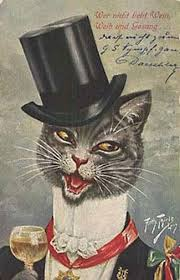
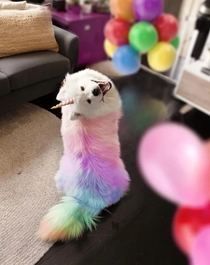


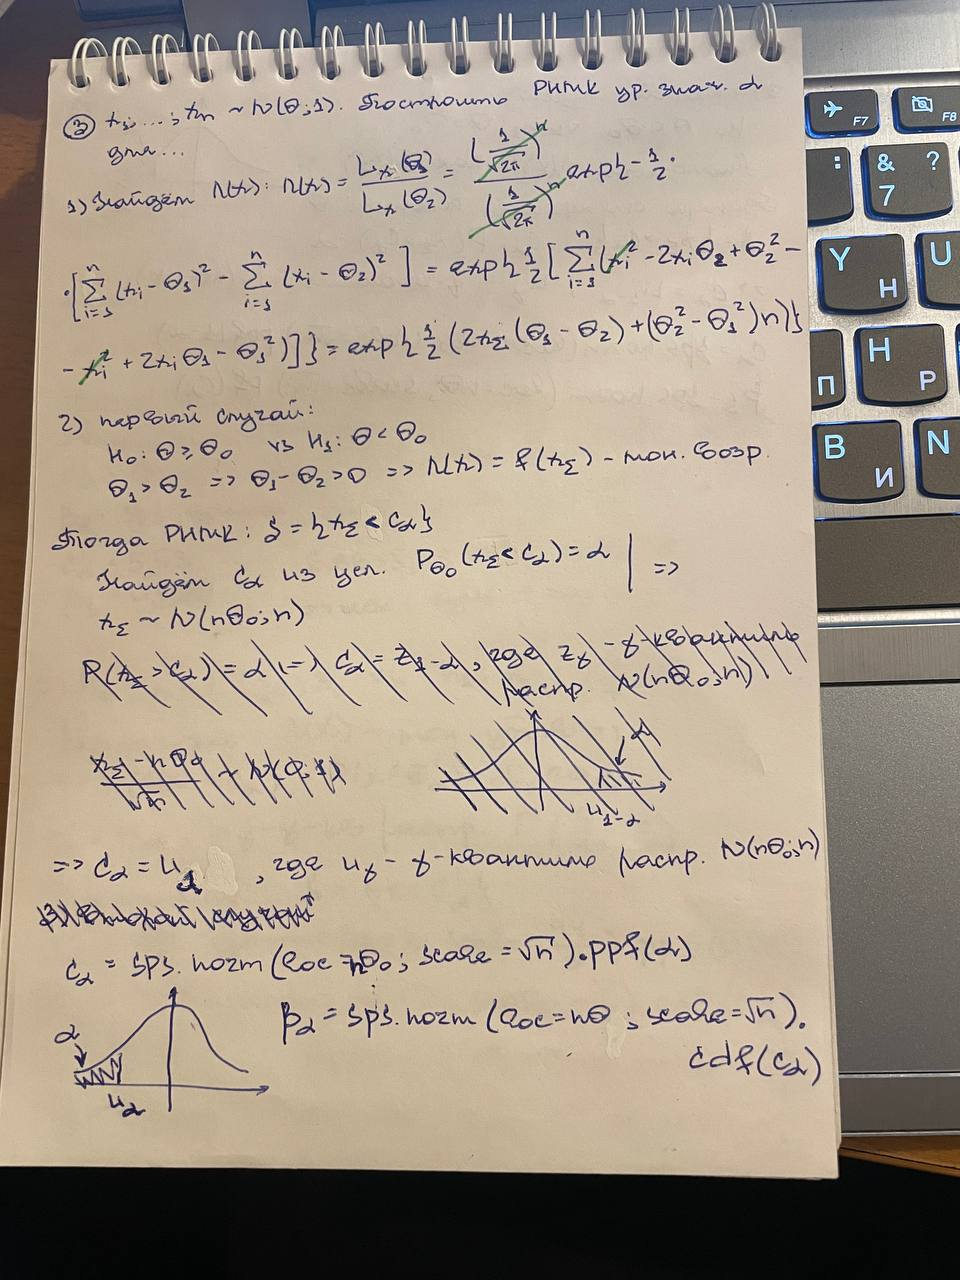

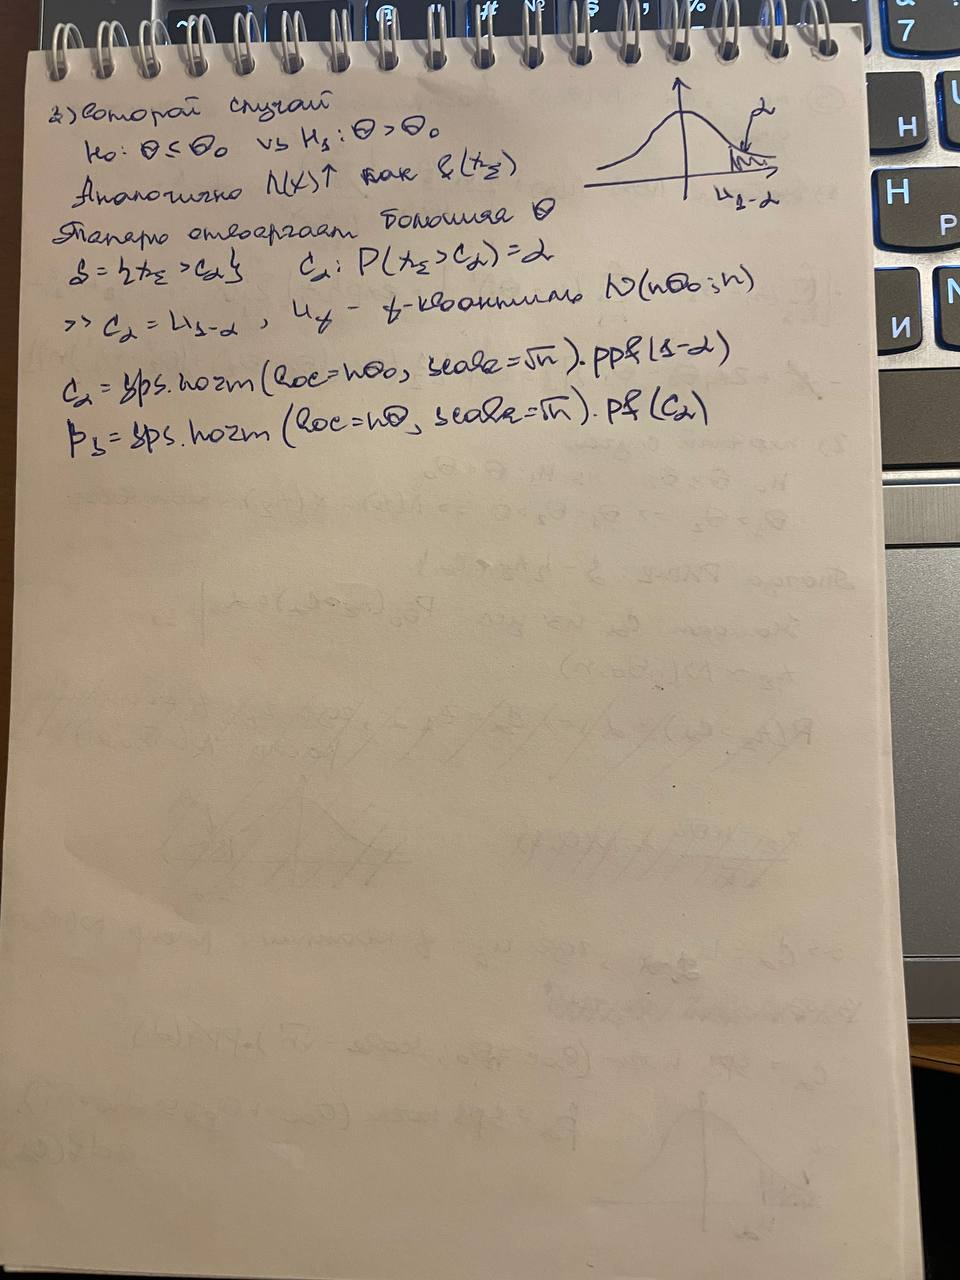

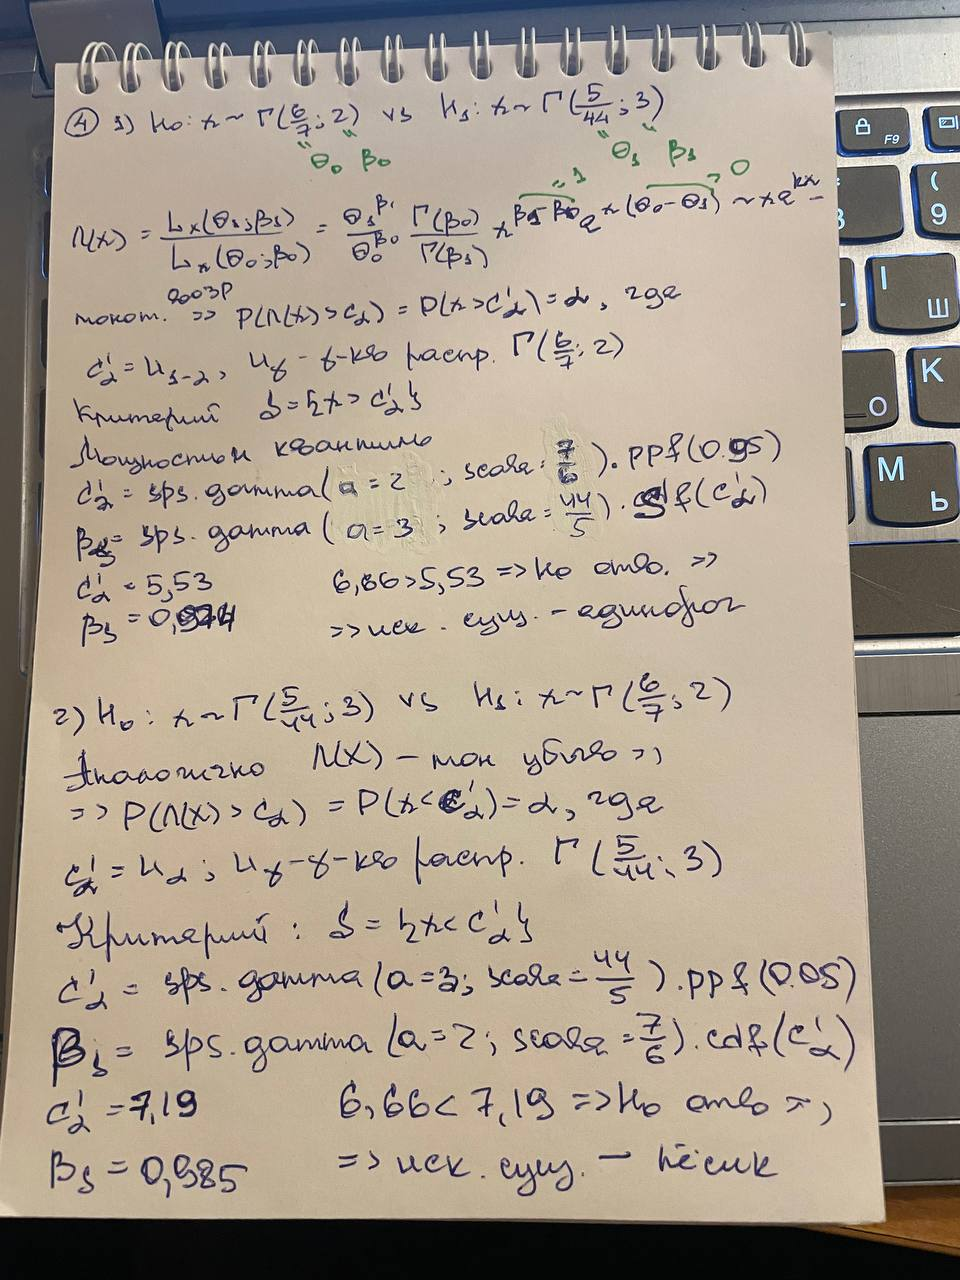

# Практическая часть


### Задача 5. 

15 баллов

Часто в физике и биологии встречаются выборки малого размера. В этом случае асимптотический доверительный интервал может давать не очень корректный ответ. Можно воспользоваться обычными доверительными интервалами или бутстрепом. Иногда обычные доверительные интервалы мы строить не умеем.

Посмотрим, насколько хорошо работают эти методы на маленькой выборке.


**1).** Рассмотрим модель $X_1, \ldots X_n \sim Exp(\theta)$.

Как мы знаем из теоретической части, эта модель хорошо описывает данные о разнице между соседними событиями, такими как появление фотона на детекторе или поломки различных систем.

В качестве оценки $\widehat \theta$ будем рассматривать $\frac{1}{\overline X}$.

Выпишите формулы для 

- а). Точного доверительного интервала для $\theta$;

$$ \left( \dfrac{g_{\dfrac{1 - \alpha}{2}}}{x_\Sigma}; \dfrac{g_{\dfrac{1 + \alpha}{2}}}{x_\Sigma} \right), $$
где $g_\gamma$ - $\gamma$ - квантиль распределения $Gamma(n, 1)$

- б). Асимптотического доверительного интервала для $\theta$;

$$ \left( \frac{1}{\overline{X}} - \frac{z_{\frac{1 + \alpha}{2}}}{\overline{X}}\sqrt{\frac{1}{n}}; \frac{1}{\overline{X}} + \frac{z_{\frac{1 + \alpha}{2}}}{\overline{X}}\sqrt{\frac{1}{n}}  
\right)$$

  *Лайфхак: $Exp(\theta) = Gamma(\theta, 1)$, далее см. теор. дз.*

- в) Нормального бутстрепного интервала с использованием $\widehat \theta$;

$$ (\widehat{\theta} - z_{\frac{1 + \alpha}{2}} \cdot \sqrt{\widehat{v}_{boot}}; \widehat{\theta} - z_{\frac{1 - \alpha}{2}} \cdot \sqrt{\widehat{v}_{boot}}) $$

- г) Центрального бутстрепного интервала с использованием $\widehat \theta$;

$$ (2\widehat{\theta} - \theta^*_{(\lceil B(1 + \alpha) / 2 \rceil)}; 2\widehat{\theta} - \theta^*_{(\lceil B(1 - \alpha) / 2 \rceil)}) $$

- д) Квантильного бутстрепного интервала с использованием $\widehat \theta$.

$$  (\theta^*_{(\lceil B(1 - \alpha) / 2 \rceil)}; \theta^*_{(\lceil B(1 + \alpha) / 2 \rceil)}) $$

Где $\widehat{\theta}=\dfrac{1}{\overline{X}},$ $\theta^*$ - оценка параметра по бустрепной выборке, B - количество бутстрепных выборок, $\widehat{v}_{boot}$ - выборочная дисперсия, взятая по бустрепным выборкам, $z_\gamma$ - $\gamma$-квантиль стандартного нормального распределения.

Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку, количество бутстрепных выборок $B$ и может принимать дополнительные параметры для вашего удобства. 

In [226]:
def bootstrap(sample, B=6):
    n = len(sample)
    
    sample_of_thetas = np.array([]).resize((B, n))
    ind = sps.randint(0, n).rvs((B, n))
    sample_of_thetas = sample[ind]
    
    sample_of_thetas = 1 / sample_of_thetas.mean(axis=1)
    sample_of_thetas.sort()
    return sample_of_thetas

Реализуйте вышеупомянутые доверительные интервалы в виде функций, принимающих на вход выборку и  выборку оценок, полученных с помощью бутстрепа. Функции могут принимать дополнительные параметры для вашего удобства. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. Обычный и асимптотический доверительный интервалы лучше также реализовать для всех подвыборок размера от 1 до n, как в предыдущем задании, так как это понадобится дальше.


В данной задаче полагайте $\alpha = 0.9$ (для наглядности).

Сгенерируйте реализации выборки из  $Exp(5)$ размеров 5 и  100 и выведите реализации вышеупомянутых доверительных интервалов для этих двух реализаций. Сделайте **выводы**.

*Обратите внимание на то, как задаются параметры экспоненциального распределеня в `scipy`.*

In [221]:
def accurate(sample, alpha=0.9):
    n = len(sample)
    g1 = sps.gamma(scale = 1, a=n).ppf((1 - alpha) / 2)
    g2 = sps.gamma(scale = 1, a=n).ppf((1 + alpha) / 2)
    return g1 / np.sum(sample), g2 / np.sum(sample)


def asimp(sample, alpha=0.9):
    z = sps.norm().ppf((1 + alpha) / 2)
    x = sample.mean()
    n = len(sample)
    return 1/x - z / (x * n ** 0.5), 1/x + z / (x * n ** 0.5)


def norm_bootstrap(sample, sample_of_thetas, alpha=0.9):
    theta = 1 / sample.mean()
    v = sample_of_thetas.var()
    z = sps.norm().ppf((1 + alpha) / 2)
    return theta - z * v ** 0.5, theta + z * v ** 0.5


def center_bootstrap(sample, sample_of_thetas, alpha=0.9):
    B = len(sample_of_thetas)
    theta = 1 / sample.mean()
    floor = int(np.ceil(B * (1 + alpha) / 2) - 1)
    ceil = int(np.ceil(B * (1 - alpha) / 2) - 1)
    return 2 * theta - sample_of_thetas[floor], 2 * theta - sample_of_thetas[ceil] 


def quant_bootstrap(sample, sample_of_thetas, alpha=0.9):
    B = len(sample_of_thetas)
    theta = 1 / sample.mean()
    floor = int(np.ceil(B * (1 + alpha) / 2) - 1)
    ceil = int(np.floor(B * (1 - alpha) / 2))
    return sample_of_thetas[ceil], sample_of_thetas[floor]

In [255]:
#Генерируем выборку и выводим интервалы
sample = sps.expon(scale=0.2).rvs(5)
boot = bootstrap(sample)
print('Size =', 5)
print("Точный доверительный интервал:", accurate(sample))
print("Асимптотический доверительный инервал:", asimp(sample))
print("Нормальный бутстрепный интервал:", norm_bootstrap(sample, boot))
print("Центральный бутсрепный интервал:", center_bootstrap(sample, boot))
print("Квантильный бустрепный интервал:", quant_bootstrap(sample, boot))

print()

sample = sps.expon(scale=0.2).rvs(100)
boot = bootstrap(sample)
print('Size =', 100)
print("Точный доверительный интервал:", accurate(sample))
print("Асимптотический доверительный инервал:", asimp(sample))
print("Нормальный бутстрепный интервал:", norm_bootstrap(sample, boot))
print("Центральный бутсрепный интервал:", center_bootstrap(sample, boot))
print("Квантильный бустрепный интервал:", quant_bootstrap(sample, boot))

Size = 5
Точный доверительный интервал: (3.282844145793214, 15.25243404722863)
Асимптотический доверительный инервал: (2.2028302739651844, 14.460088110584692)
Нормальный бутстрепный интервал: (5.017223593625549, 11.645694790924328)
Центральный бутсрепный интервал: (4.930506153005812, 10.959961841440938)
Квантильный бустрепный интервал: (5.702956543108938, 11.732412231544064)

Size = 100
Точный доверительный интервал: (4.5938543637563924, 6.387834723466209)
Асимптотический доверительный инервал: (4.56176079645451, 6.35788224216306)
Нормальный бутстрепный интервал: (4.8837209502561585, 6.035922088361412)
Центральный бутсрепный интервал: (4.854843768167305, 5.903910826270254)
Квантильный бустрепный интервал: (5.0157322123473165, 6.064799270450266)


**Вывод:** чем больше выборка, но основании которой строится доверительный интервал, тем меньше его размер. Бутстрепные интервалы чаще дают интервал, в который не попадает исходное значение, но опять же дают более точный результат при бОльших выборках.

Теперь оценим, каков реальный уровень доверия этих доверительных интервалов при маленьком размере выборки. Для этого сгенерируйте 300 выборок размера 5 из $Exp(5)$. 

По каждой выборке посчитайте выборку оценок методом бутстрепа с $B = 300$. Посчитайте реализации всех доверительных интервалов, а также, какова доля реализаций выборок, для которых истинное значение параметра ($5$) попадает в реализацию доверительнго интервала (для каждого типа интервала в отдельности).

 Какой должна быть эта доля у доверительного интервала согласно определению? Выведите получившиеся доли для всех типов интервалов.

*Предупреждение: код может работать долго, особенно при неоптимальной реализации.*

Сделайте **выводы**.

In [165]:
size = 5
count = 300
B = 300
sample = sps.expon(scale=0.2).rvs((count, size))
boot = np.array([bootstrap(sample[i], B) for i in range(count)])
hit = {
    'accurate': 0,
    'asimp': 0,
    'norm_bootstrap': 0,
    'center_bootstrap': 0,
    'quant_bootstrap': 0
}

name = {
    'accurate': "Точный доверительный интервал:",
    'asimp': "Асимптотический доверительный инервал:",
    'norm_bootstrap': "Нормальный бутстрепный интервал:",
    'center_bootstrap': "Центральный бутсрепный интервал:",
    'quant_bootstrap': "Квантильный бустрепный интервал:"
}

for i in range(count):
    a, b = accurate(sample[i])
    if a <= 5 <= b:
        hit['accurate'] += 1
        
    a, b = asimp(sample[i])
    if a <= 5 <= b:
        hit['asimp'] += 1
    
    a, b = norm_bootstrap(sample[i], boot[i])
    if a <= 5 <= b:
        hit['norm_bootstrap'] += 1
        
    a, b = center_bootstrap(sample[i], boot[i])
    if a <= 5 <= b:
        hit['center_bootstrap'] += 1
    
    a, b = quant_bootstrap(sample[i], boot[i])
    if a <= 5 <= b:
        hit['quant_bootstrap'] += 1
        
print("Размер выборки:", size)
for x in hit.keys():
    print(name[x], hit[x] / count)

Размер выборки: 5
Точный доверительный интервал: 0.9133333333333333
Асимптотический доверительный инервал: 0.9366666666666666
Нормальный бутстрепный интервал: 0.8266666666666667
Центральный бутсрепный интервал: 0.7
Квантильный бустрепный интервал: 0.64


**Вывод:** по определению долю попаданий должна быть близка 0,9. Это в целом соблюдается для точного и асимптотического интервала, для бустрепных интервалов заметно меньше, но при этом доля попаданий в бустрепные интервалы достаточно велика (это можно объяснить довольно большим количеством бутстрепных выборок).

Проведите аналогичное исследование для обычного и асимптотичского доверительного интервалов при длине выборки $n = 100$. Сделайте **выводы**.

In [256]:
size = 100
count = 300
B = 300
sample = sps.expon(scale=0.2).rvs((count, size))
boot = np.array([bootstrap(sample[i], B) for i in range(count)])
hit = {
    'accurate': 0,
    'asimp': 0
}
for i in range(count):
    a, b = accurate(sample[i])
    if a <= 5 <= b:
        hit['accurate'] += 1
        
    a, b = asimp(sample[i])
    if a <= 5 <= b:
        hit['asimp'] += 1

print("Размер выборки:", size)
for x in hit.keys():
    print(name[x], round(hit[x] / count, 3))

Размер выборки: 100
Точный доверительный интервал: 0.893
Асимптотический доверительный инервал: 0.893


**Вывод:** в среднем на малых размерах точный и доверительный интервал работают хорошо, уровеь доверия соответсвтует реальной доле попаданий. Поэтому мы можем их применять и на малых выюорках, но на больших они будут короче, поэтому пользоваться ими практичнее.

Теперь постройте графики зависимости обычного доверительного интервала и асимптотического доверительного интервала от $n$ (от 1 до 300) аналогично предыдущей задаче. Следите за читабельностью графиков, пользуйтесь `ylim`.


Помогли ли графики лучше понять произошедшее ранее?

Сделайте **выводы** по всей задаче.

In [167]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка'
):  

    time = np.arange(1, len(left) + 1)
    plt.fill_between(time, right, left, label = 'Доверительный интервал', alpha=0.15, color=color_interval)

    if not sample is None:
        plt.scatter(time, sample, alpha=0.2, s=40, 
                    label='Выборка', color=color_sample)  # s - размер точек
    if not estimation is None:
        plt.plot(time, estimation, color=color_estimation, 
                 linewidth=2.5, label=label_estimation)  # linewidth - толщина линии


    
    plt.xlim((1, len(left)))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
    plt.ylim(ylim)  # размеры графика по вертикальной оси 
    plt.xlabel('Размер выборки')  # название горизонтальной оси (аналогично plt.ylabel)
    plt.title('Зависимость точечной и интервальной оценок от длины выборки')  # имя графика
    plt.grid()  # добавляем сетку

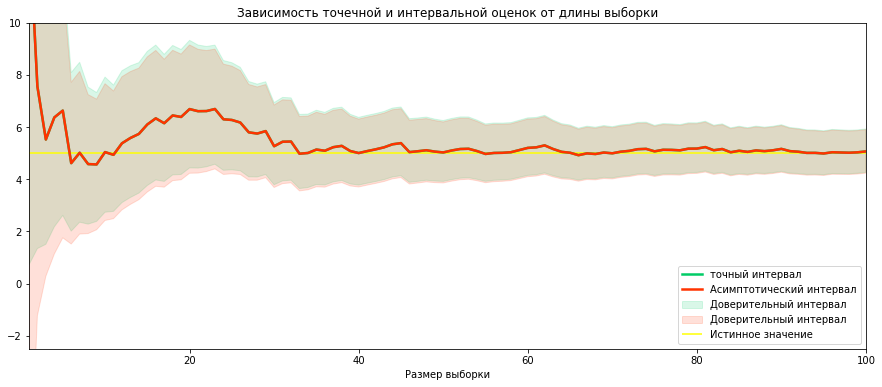

In [202]:
plt.figure(figsize=(15, 6))
size = 100 # в задании 300, но столько брать смысла нет, всё равно они совпадают уже там почти
sample = sps.expon(scale=0.2).rvs(size)
left_ac = np.zeros(size)
right_ac = np.zeros(size)
left_as = np.zeros(size)
right_as = np.zeros(size)

for i in range(1, size + 1):
    a, b = accurate(sample[:i])
    left_ac[i - 1] = a
    right_ac[i - 1] = b
    
    a, b = asimp(sample[:i])
    left_as[i - 1] = a
    right_as[i - 1] = b
    
n = np.arange(1, size + 1)
draw_confidence_interval(left_ac, right_ac, n / sample.cumsum(), None, (-2.5, 10), 
                         green, green, green, "точный интервал")
draw_confidence_interval(left_as, right_as, n / sample.cumsum(), None, (-2.5, 10), 
                         red, red, green, "Асимптотический интервал")
plt.hlines(5, 1, 100, color='yellow', label='Истинное значение')
plt.legend(loc='lower right')
plt.show()

**Вывод:** в этой задаче были исследованы 5 типов доверительных интервалов. Бутстрепные интервалы применимы для малых выброк, но дают ощутимо худший результат по сравнению с обычными точными и асимптотическими доверительными интервалами. Размер всех видов интервалов уменьшается при увеличении размера выборки. Разница между точным и асимптотическим доверительным интервалом для данного распределения становится незаметной уже для $n \approx 20$, это подтверждает подсчёт доли попадания знаяения в интервалы для $n \in (1; 100)$ для этих интервалов, а также это наглядно демонстрирует график.

**2)** Бонусная часть

Проведите все те же исследования для модели $N(\theta, 1)$, которая описывает многие физические эксперименты. Есть ли различия? Как вы можете их объяснить? Сделайте **выводы**.

### Задача 6.

12 баллов



Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ &mdash; неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает отсутствие связи между черным котом и неудачей, первая &mdash; что неудача происходит чаще если черный кот перебегает дорогу.

Известно, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. Это получается аналогично [примеру](https://wiki.yandex.ru/homepage/phystechdatascience-chast-1/vesna-2021/.files/examplernmk-1.pdf), разобранному на wiki. 

Чему при этом равно $c_\alpha$? Как определить p-value?

Посчитаем $c_\alpha$: согласно примеру с wiki оно находится из расчёта $ P_{p_0} (x_\Sigma \geq c_\alpha) = \alpha$. При этом $x_\Sigma \sim Bin(n, p).$ Т. е. по условию теоремы положив $p_0 = 0.5,$ получим, что если $u_\alpha$ - $\alpha$ - квантиль распредления $Bin(n, 0.5)$, то
$$c_\alpha = \begin{cases}
   u_\alpha &\text{P = } \alpha \\
   u_\alpha + 1 &\text{иначе}
 \end{cases}$$
Код для подсчёта $c_\alpha$:

In [238]:
n = 100
alpha = 0.95
с = sps.binom(n=n, p=0.5).ppf(alpha)
print(c)

268.0


In [241]:
t = 4 # - статистика, взята от балды
p_value = sps.binom(n=n, p=0.5).sf(t) #вероятность найти более экстремальную выборку, исходя из предположения p=0.5

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$. Для этого сгенерируйте разные реализации выборок и посчитайте по ним реализации статистики.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы, можно через `pandas.DataFrame`.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [266]:
alpha = 0.95
sizes = np.array([5, 10, 50, 100, 200, 500, 1000])

d = {'c': pd.Series([None for i in range(len(sizes))], index=sizes),
     0.4: pd.Series([None for i in range(len(sizes))], index=sizes),
     0.5: pd.Series([None for i in range(len(sizes))], index=sizes),
     0.6: pd.Series([None for i in range(len(sizes))], index=sizes),
     0.75: pd.Series([None for i in range(len(sizes))], index=sizes),
     0.9: pd.Series([None for i in range(len(sizes))], index=sizes),
    }
df = pd.DataFrame(d)
t = pd.DataFrame(d)
sol = pd.DataFrame(d)

for n in sizes:
    df['c'][n] = sps.binom(n=n, p=0.5).ppf(alpha)
    t['c'][n] = sps.binom(n=n, p=0.5).ppf(alpha)
    for p in [0.4, 0.5, 0.6, 0.75, 0.9]:
        sample = sps.bernoulli(p=p).rvs(n)
        t[p][n] = sample.sum()
        p_value = sps.binom(n=n, p=0.5).sf(sample.sum())
        df[p][n] = p_value
        sol[p][n] = (p_value < (1 - alpha))

In [267]:
print('Таблица значений p-value и c')
df

Таблица значений p-value и c


,c,0.4,0.5,0.6,0.75,0.9
5,4.0,0.03125,0.1875,0.0,0.0,0.1875
10,8.0,0.623047,0.376953,0.054688,0.000977,0.0
50,31.0,0.898681,0.760056,0.001301,0.000468,0.0
100,58.0,0.955687,0.184101,0.0176,0.0,0.0
200,112.0,0.999299,0.528174,0.009698,0.0,0.0
500,268.0,0.99999,0.482168,0.0,0.0,0.0
1000,526.0,0.999999,0.587587,0.0,0.0,0.0


In [268]:
print('\n', 'Таблица значений T(x)')
t


 Таблица значений T(x)


,c,0.4,0.5,0.6,0.75,0.9
5,4.0,4,3,5,5,3
10,8.0,4,5,7,9,10
50,31.0,20,22,35,36,46
100,58.0,41,54,60,76,94
200,112.0,77,99,116,147,179
500,268.0,202,250,313,376,443
1000,526.0,423,496,590,734,894


In [269]:
print('\n', 'Таблица отвержений, True - отвержение')
sol[sol.columns[1:]]


 Таблица отвержений, True - отвержение


,0.40,0.50,0.60,0.75,0.90
5,True,False,True,True,False
10,False,False,False,True,True
50,False,False,True,True,True
100,False,False,True,True,True
200,False,False,True,True,True
500,False,False,True,True,True
1000,False,False,True,True,True


Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 

Большая часть значений начинает отвергаться при $p=0.6$

Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 -- отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [251]:
count = 10
par = {
    'n' : (5, 10 ** 5),
    'p' : (0.75, 0.51)
}

d = {'c': pd.Series([None for i in range(count)]),
     'T(x)': pd.Series([None for i in range(count)]),
     'p': pd.Series([None for i in range(count)]),
     'Отвергаем': pd.Series([None for i in range(count)])
    }

df = pd.DataFrame(d)

for i in range(2):
    n = par['n'][i]
    p = par['p'][i]
    sample =sps.bernoulli(p=p).rvs((count, n))
    for i in range(count):
        df['c'][i] = sps.binom(n=n, p=0.5).ppf(alpha)
        t = sample[i].sum()
        df['T(x)'][i] = t
        p_value = sps.binom(n=n, p=0.5).sf(t)
        df['p'][i] = p_value
        df['Отвергаем'][i] = int(p_value < (1 - alpha))
    print('n =', n, "p =", p)
    print(df)
    print()

n = 5 p = 0.75
     c T(x)        p Отвергаем
0  4.0    4  0.03125         1
1  4.0    4  0.03125         1
2  4.0    3   0.1875         0
3  4.0    3   0.1875         0
4  4.0    3   0.1875         0
5  4.0    5      0.0         1
6  4.0    4  0.03125         1
7  4.0    3   0.1875         0
8  4.0    4  0.03125         1
9  4.0    2      0.5         0

n = 100000 p = 0.51
         c   T(x)    p Отвергаем
0  50260.0  51090  0.0         1
1  50260.0  51223  0.0         1
2  50260.0  50842  0.0         1
3  50260.0  51198  0.0         1
4  50260.0  51336  0.0         1
5  50260.0  50920  0.0         1
6  50260.0  50821  0.0         1
7  50260.0  50999  0.0         1
8  50260.0  51090  0.0         1
9  50260.0  51100  0.0         1



**Вывод:** мощность критерия p-value очень зависит от размера выборки: несмотря на то, что различие параметров в первом случае многократно больше, чем во втором, во втором случае критерий работает лучше, так как выборка гораздо больше. С другой строны большие выборки обрабатывать дольше и грустнее, что автоматически приводит нас к следующей задаче: 

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05. По оси $x$ должно быть значение $p$, по оси $y$ &mdash; значение мощности критерия при данном параметре. Мощность считается аналитически, аналогично примеру на wiki. Обратите внимание, что текущая задача немного отличается от примера. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

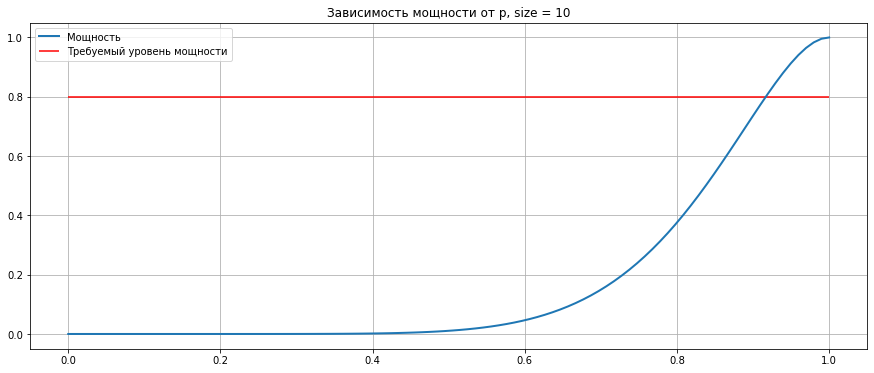

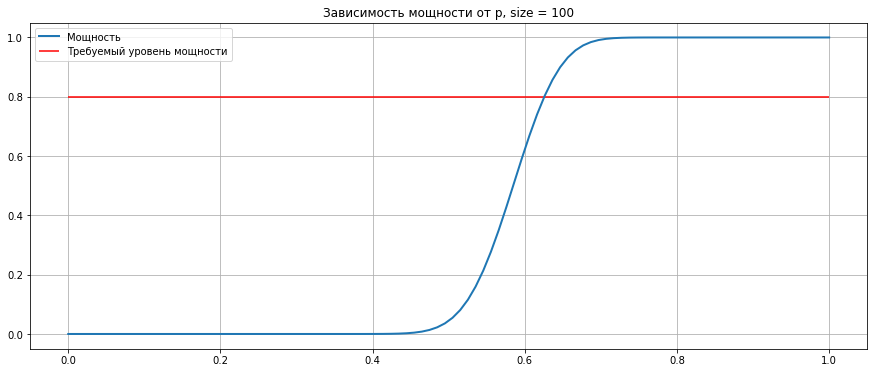

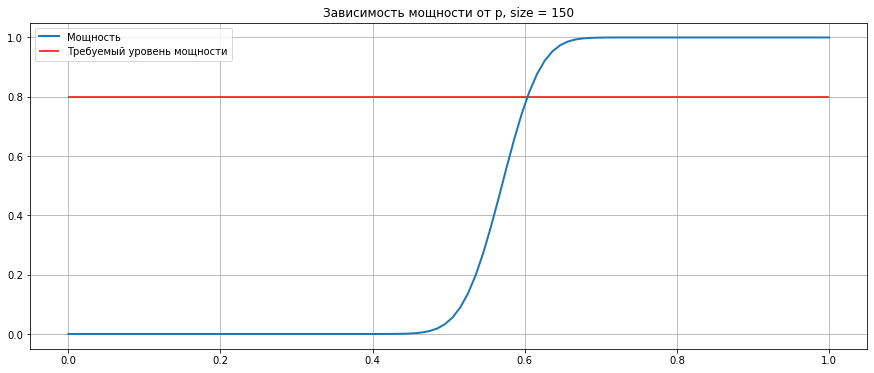

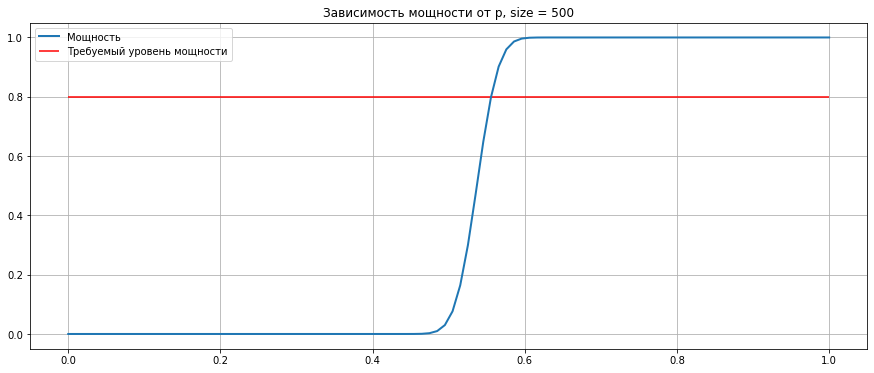

In [215]:
#p* = 0.6
alpha = 0.95
sizes = [10, 100, 150, 500]
for n in sizes:
    p = np.linspace(0, 1, 100)
    c = sps.binom(n=n, p=0.5).ppf(alpha)
    beta = sps.binom(n=n, p=p).sf(c)
    plt.figure(figsize=(15, 6))
    
    plt.plot(p, beta, label='Мощность', lw=2)
    plt.title('Зависимость мощности от p, size = ' + str(n))
    plt.hlines(0.8, 0, 1, color="red", label="Требуемый уровень мощности")
    plt.grid()
    plt.legend();
    plt.show()
    

Из графиков очевидно, что для исследований с $p^* = 0.6$ оптимальный размер выборки 150 элементов.

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.

In [252]:
count = 10

d = {'c': pd.Series([None for i in range(count)]),
     'T(x)': pd.Series([None for i in range(count)]),
     'p': pd.Series([None for i in range(count)]),
     'Отвергаем': pd.Series([None for i in range(count)])
    }

df = pd.DataFrame(d)
for p in [0.59, 0.61]:
    n = 150
    sample = sps.bernoulli(p=p).rvs((count, n))
    for i in range(count):
        df['c'][i] = sps.binom(n=n, p=0.5).ppf(alpha)
        t = sample[i].sum()
        df['T(x)'][i] = t
        p_value = sps.binom(n=n, p=0.5).sf(t)
        df['p'][i] = p_value
        df['Отвергаем'][i] = int(p_value < (1 - alpha))
    print('n =', n, "p =", p)
    print(df)
    print()

n = 150 p = 0.59
      c T(x)         p Отвергаем
0  85.0   98  0.000055         1
1  85.0  101  0.000006         1
2  85.0   83  0.082453         0
3  85.0   81  0.144228         0
4  85.0   87  0.020434         1
5  85.0   89  0.008799         1
6  85.0   87  0.020434         1
7  85.0  100  0.000013         1
8  85.0   90  0.005561         1
9  85.0   97  0.000108         1

n = 150 p = 0.61
      c T(x)         p Отвергаем
0  85.0   87  0.020434         1
1  85.0   94  0.000685         1
2  85.0   91  0.003426         1
3  85.0   88  0.013576         1
4  85.0   90  0.005561         1
5  85.0   96  0.000205         1
6  85.0   96  0.000205         1
7  85.0   95   0.00038         1
8  85.0   96  0.000205         1
9  85.0   95   0.00038         1



**Вывод:** в задании выше было получено, что слишком большая или слишком маленькая выборка это нехорошо (одна недостаточно мощная, другая слишком мощная и отвергает слишком много), поэтому была предпринята попытка подогнать мощность критерия под условную границы значимости различия $p^* = 0.6$. Построив графики зависимости мощности от $p$, фактически бин поиском смогли найти оптимальный размер выборки $n^* \approx 150$. После проверки на практике было установлено, что доля ошибок после критического значения $p^*$ очень мало, до - проскакивает заметное, но не очень значительное количество ошибок второго рода. То есть полученный критерий работает хорошо:)

(array([ 32751.,  26983.,  42065.,      0.,      0.,  60032.,      0.,
             0.,  78584.,      0.,      0.,  95825.,      0.,      0.,
             0.,      0., 107961.,      0.,      0.,      0.,      0.,
             0., 112215.,      0.,      0.,      0.,      0., 108266.,
             0.,      0.,      0.,      0.,      0.,  95672.,      0.,
             0.,      0.,      0.,  78753.,      0.,      0.,  59784.,
             0.,      0.,  41509.,      0.,      0.,  27034.,  16125.,
         16441.]),
 array([1.04933871e-07, 2.00000467e-02, 3.99999885e-02, 5.99999302e-02,
        7.99998720e-02, 9.99998137e-02, 1.19999755e-01, 1.39999697e-01,
        1.59999639e-01, 1.79999581e-01, 1.99999523e-01, 2.19999464e-01,
        2.39999406e-01, 2.59999348e-01, 2.79999290e-01, 2.99999231e-01,
        3.19999173e-01, 3.39999115e-01, 3.59999057e-01, 3.79998998e-01,
        3.99998940e-01, 4.19998882e-01, 4.39998824e-01, 4.59998765e-01,
        4.79998707e-01, 4.99998649e-01, 5.19998591e-

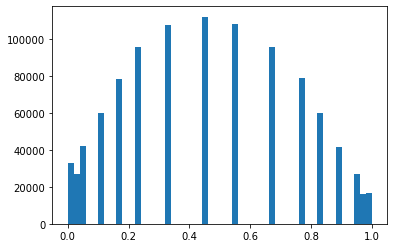

In [272]:
count = 10 ** 6
n = 50
p = 0.5
samples = sps.bernoulli(p=p).rvs((count, n))
t = samples.sum(axis=1)
p_values = sps.binom(n=n, p=0.5).sf(t)

plt.hist(p_values, bins=50)